## Problem 4(LinearSeparation)

In [297]:
data4=pd.read_csv(r"C:\Users\harsh\Downloads\data (1)\demo_data\4.linearsep.csv",header=None)

In [298]:
data4.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [299]:
data4[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [300]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data4[[0,1]],data4[2],test_size=0.1)

In [301]:
from sklearn.preprocessing import StandardScaler
scaler4=StandardScaler()

In [302]:
data_rescaled=scaler4.fit_transform(X_train)

In [125]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model4=Sequential()

In [126]:
model4.add(Dense(7,activation="sigmoid",input_dim=2))
model4.add(Dense(5,activation="sigmoid"))
model4.add(Dense(4,activation="sigmoid"))
model4.add(Dense(3,activation="sigmoid"))
model4.add(Dense(1,activation="sigmoid"))

In [127]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 7)                 21        
                                                                 
 dense_66 (Dense)            (None, 5)                 40        
                                                                 
 dense_67 (Dense)            (None, 4)                 24        
                                                                 
 dense_68 (Dense)            (None, 3)                 15        
                                                                 
 dense_69 (Dense)            (None, 1)                 4         
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [128]:
model4.compile(optimizer="adam",loss="binary_crossentropy")

In [129]:
model4.fit(X_train,y_train,batch_size=10,epochs=300,verbose=1)

Epoch 1/300
9/9 [==============================] - 0s 999us/step - loss: 0.8464
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8371
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8284
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8190
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8100
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8032
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7956
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7881
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7817
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7763
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7701
Epoch 12/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7649
Epoch 13/300
9/9 [==============================] - 0s 1ms/

9/9 [==============================] - 0s 1ms/step - loss: 0.3112
Epoch 207/300
9/9 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 208/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3081
Epoch 209/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3065
Epoch 210/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3050
Epoch 211/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 212/300
9/9 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 213/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3009
Epoch 214/300
9/9 [==============================] - 0s 1ms/step - loss: 0.2993
Epoch 215/300
9/9 [==============================] - 0s 1ms/step - loss: 0.2977
Epoch 216/300
9/9 [==============================] - 0s 1ms/step - loss: 0.2964
Epoch 217/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 218/300
9/9 [==============================] - 0

In [130]:
pred_=model4.predict(X_train)

3/3 [==============================] - 0s 0s/step


In [131]:
pred_=np.ravel(np.where(pred_<0.5,0,1))
pred_=pd.Series(pred_)
pred_.index=y_train.index
pred_

5     1
41    1
82    0
83    1
71    0
     ..
22    1
26    0
54    1
9     0
31    1
Length: 90, dtype: int32

<AxesSubplot:xlabel='0', ylabel='1'>

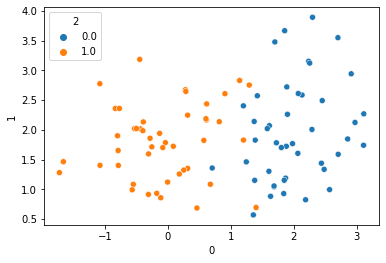

In [132]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

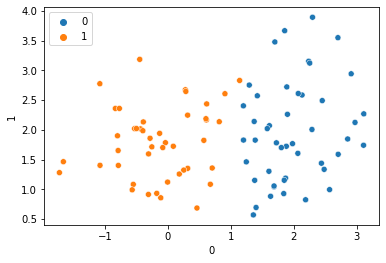

In [133]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred_)

In [134]:
metrics.accuracy_score(y_train,pred_)

0.9555555555555556

#### Using batch normalization and weights initialization

In [303]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model4_=Sequential()

In [304]:
model4_.add(Dense(6,activation="relu",input_dim=2, kernel_initializer='glorot_normal'))
model4_.add(Dense(3,activation="relu", kernel_initializer='glorot_normal'))
model4_.add(BatchNormalization())
model4_.add(Dense(1,activation="sigmoid"))

In [305]:
model4_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [306]:
model4_.fit(X_train,y_train,batch_size=10,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 1s 16ms/step - loss: 1.0532 - accuracy: 0.3750 - val_loss: 0.7475 - val_accuracy: 0.3333
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.9968 - accuracy: 0.3611 - val_loss: 0.7405 - val_accuracy: 0.3333
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.9378 - accuracy: 0.3472 - val_loss: 0.7312 - val_accuracy: 0.4444
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8927 - accuracy: 0.4583 - val_loss: 0.7155 - val_accuracy: 0.4444
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8141 - accuracy: 0.5278 - val_loss: 0.6937 - val_accuracy: 0.6111
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5556 - val_loss: 0.6727 - val_accuracy: 0.6111
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6194 - accuracy: 0.5833 - val_loss: 0.6531 - val_accuracy: 0.6667
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9583 - val_loss: 0.0845 - val_accuracy: 1.0000
Epoch 118/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1800 - accuracy: 0.9583 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 119/200
8/8 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.9167 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 120/200
8/8 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9444 - val_loss: 0.0812 - val_accuracy: 1.0000
Epoch 121/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9861 - val_loss: 0.0854 - val_accuracy: 1.0000
Epoch 122/200
8/8 [==============================] - 0s 4ms/step - loss: 0.1765 - accuracy: 0.9167 - val_loss: 0.0867 - val_accuracy: 1.0000
Epoch 123/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1688 - accuracy: 0.9444 - val_loss: 0.0947 - val_accuracy: 0.9444
Epoch 124/200
8/8 [========

In [307]:
pred4=model4_.predict(X_train)

3/3 [==============================] - 0s 987us/step


In [308]:
pred4=np.ravel(np.where(pred4<0.5,0,1))
pred4=pd.Series(pred4)
pred4.index=y_train.index
pred4

10    0
88    1
82    0
26    0
19    1
     ..
5     1
48    0
0     1
21    0
94    1
Length: 90, dtype: int32

In [309]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 2s 509us/step


<AxesSubplot:>

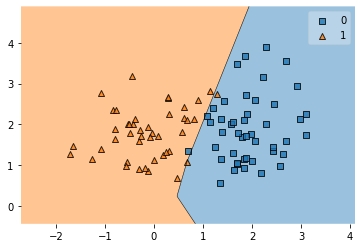

In [310]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model4_)

In [311]:
metrics.accuracy_score(y_train,pred4)

0.9666666666666667